In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('./cleaned_data.xlsx')



# IMPORTANT VARIABLES

countries = {'DEU': 'Germany', 'GBR': 'United Kindgdom', 'FRA': 'France', 'ESP': 'Spain', 
             'PRT': 'Portugal', 'ITA': 'Italy','IRL': 'Ireland', 'BEL': 'Belgium','BRA': 'Brazil','NLD': 'Netherlands'}
meals = {'BB': 'Bed & Breakfast',
         'SC': 'No Meal',
         
	'HB': 'Half board (breakfast and one other meal – usually dinner)',
	'FB': 'Full board (breakfast, lunch and dinner)'}


titles = {'reservation_status': 'Last Status', 'is_repeated_guest': 'Is Repeated Guest', 'market_segment': 'Market Segment', 'hotel': 'Favorite Hotel'}

# Costumers Statistics

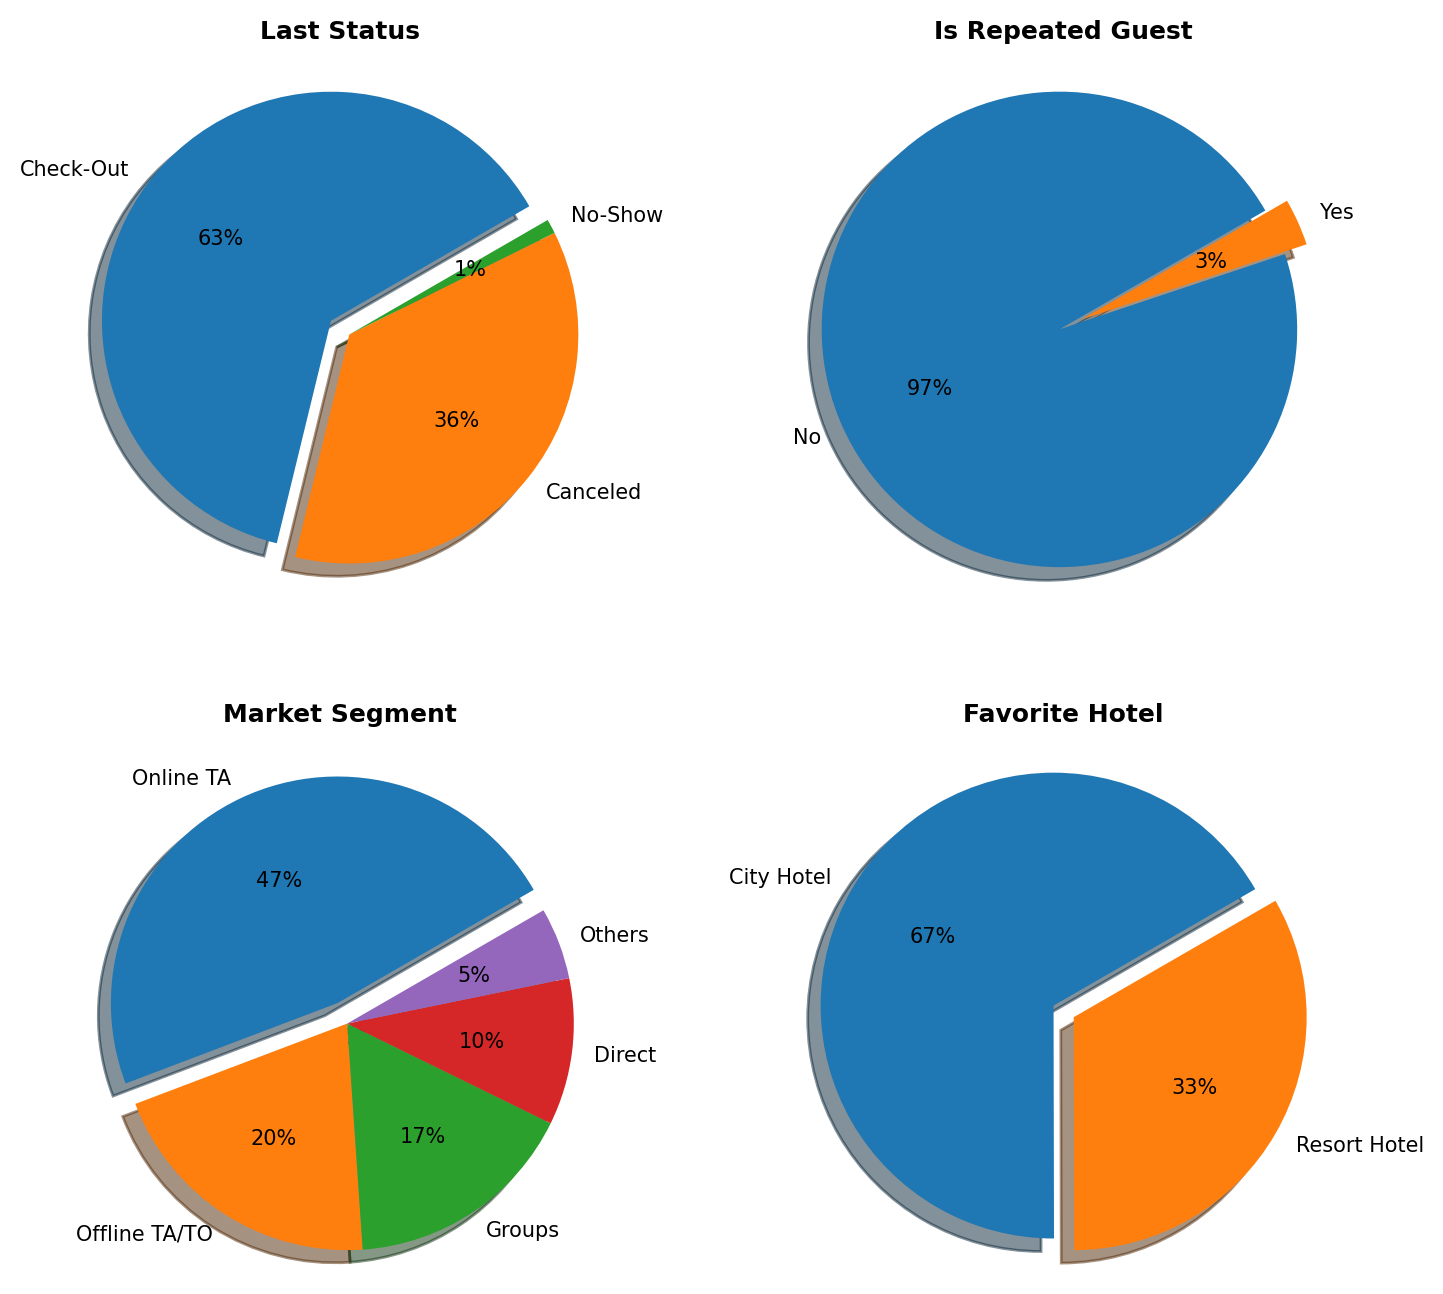

In [5]:
data3 = list(df['market_segment'].value_counts())
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), dpi=200)

count = 0
col = 0
for c in titles.keys():
	data = list(df[c].value_counts())

    
	labels =  list(map(lambda x: 'Yes' if x== 1 else 'No' if x == 0 else x,list(df[c].value_counts().index)))

	if c == 'market_segment':
		data = data[0:4] + [sum(data3[4:])]
		labels =  labels[0:4] + ['Others']
	explode = list(map(lambda x: 0.1 if x == max(data) else 0, data))
	axes[col][count].pie(data, shadow=True, startangle=30,labels = labels,explode=explode, autopct='%.0f%%',textprops={'fontsize': 7.5})
	
	fig.subplots_adjust(wspace=0.4, hspace=0.3)
	axes[col][count].set_title(titles[c], fontsize=9, pad=10, fontweight=700)
	axes[col][count].axis('equal') 
	col = col if count == 0 else col + 1
	count = 1 if count == 0 else 0




# How customers from different choose their meals

BB – Bed & Breakfast; 
HB – Half board (breakfast and one other meal – usually dinner); 
SC – no meal package; 
FB – Full board (breakfast, lunch and dinner) 



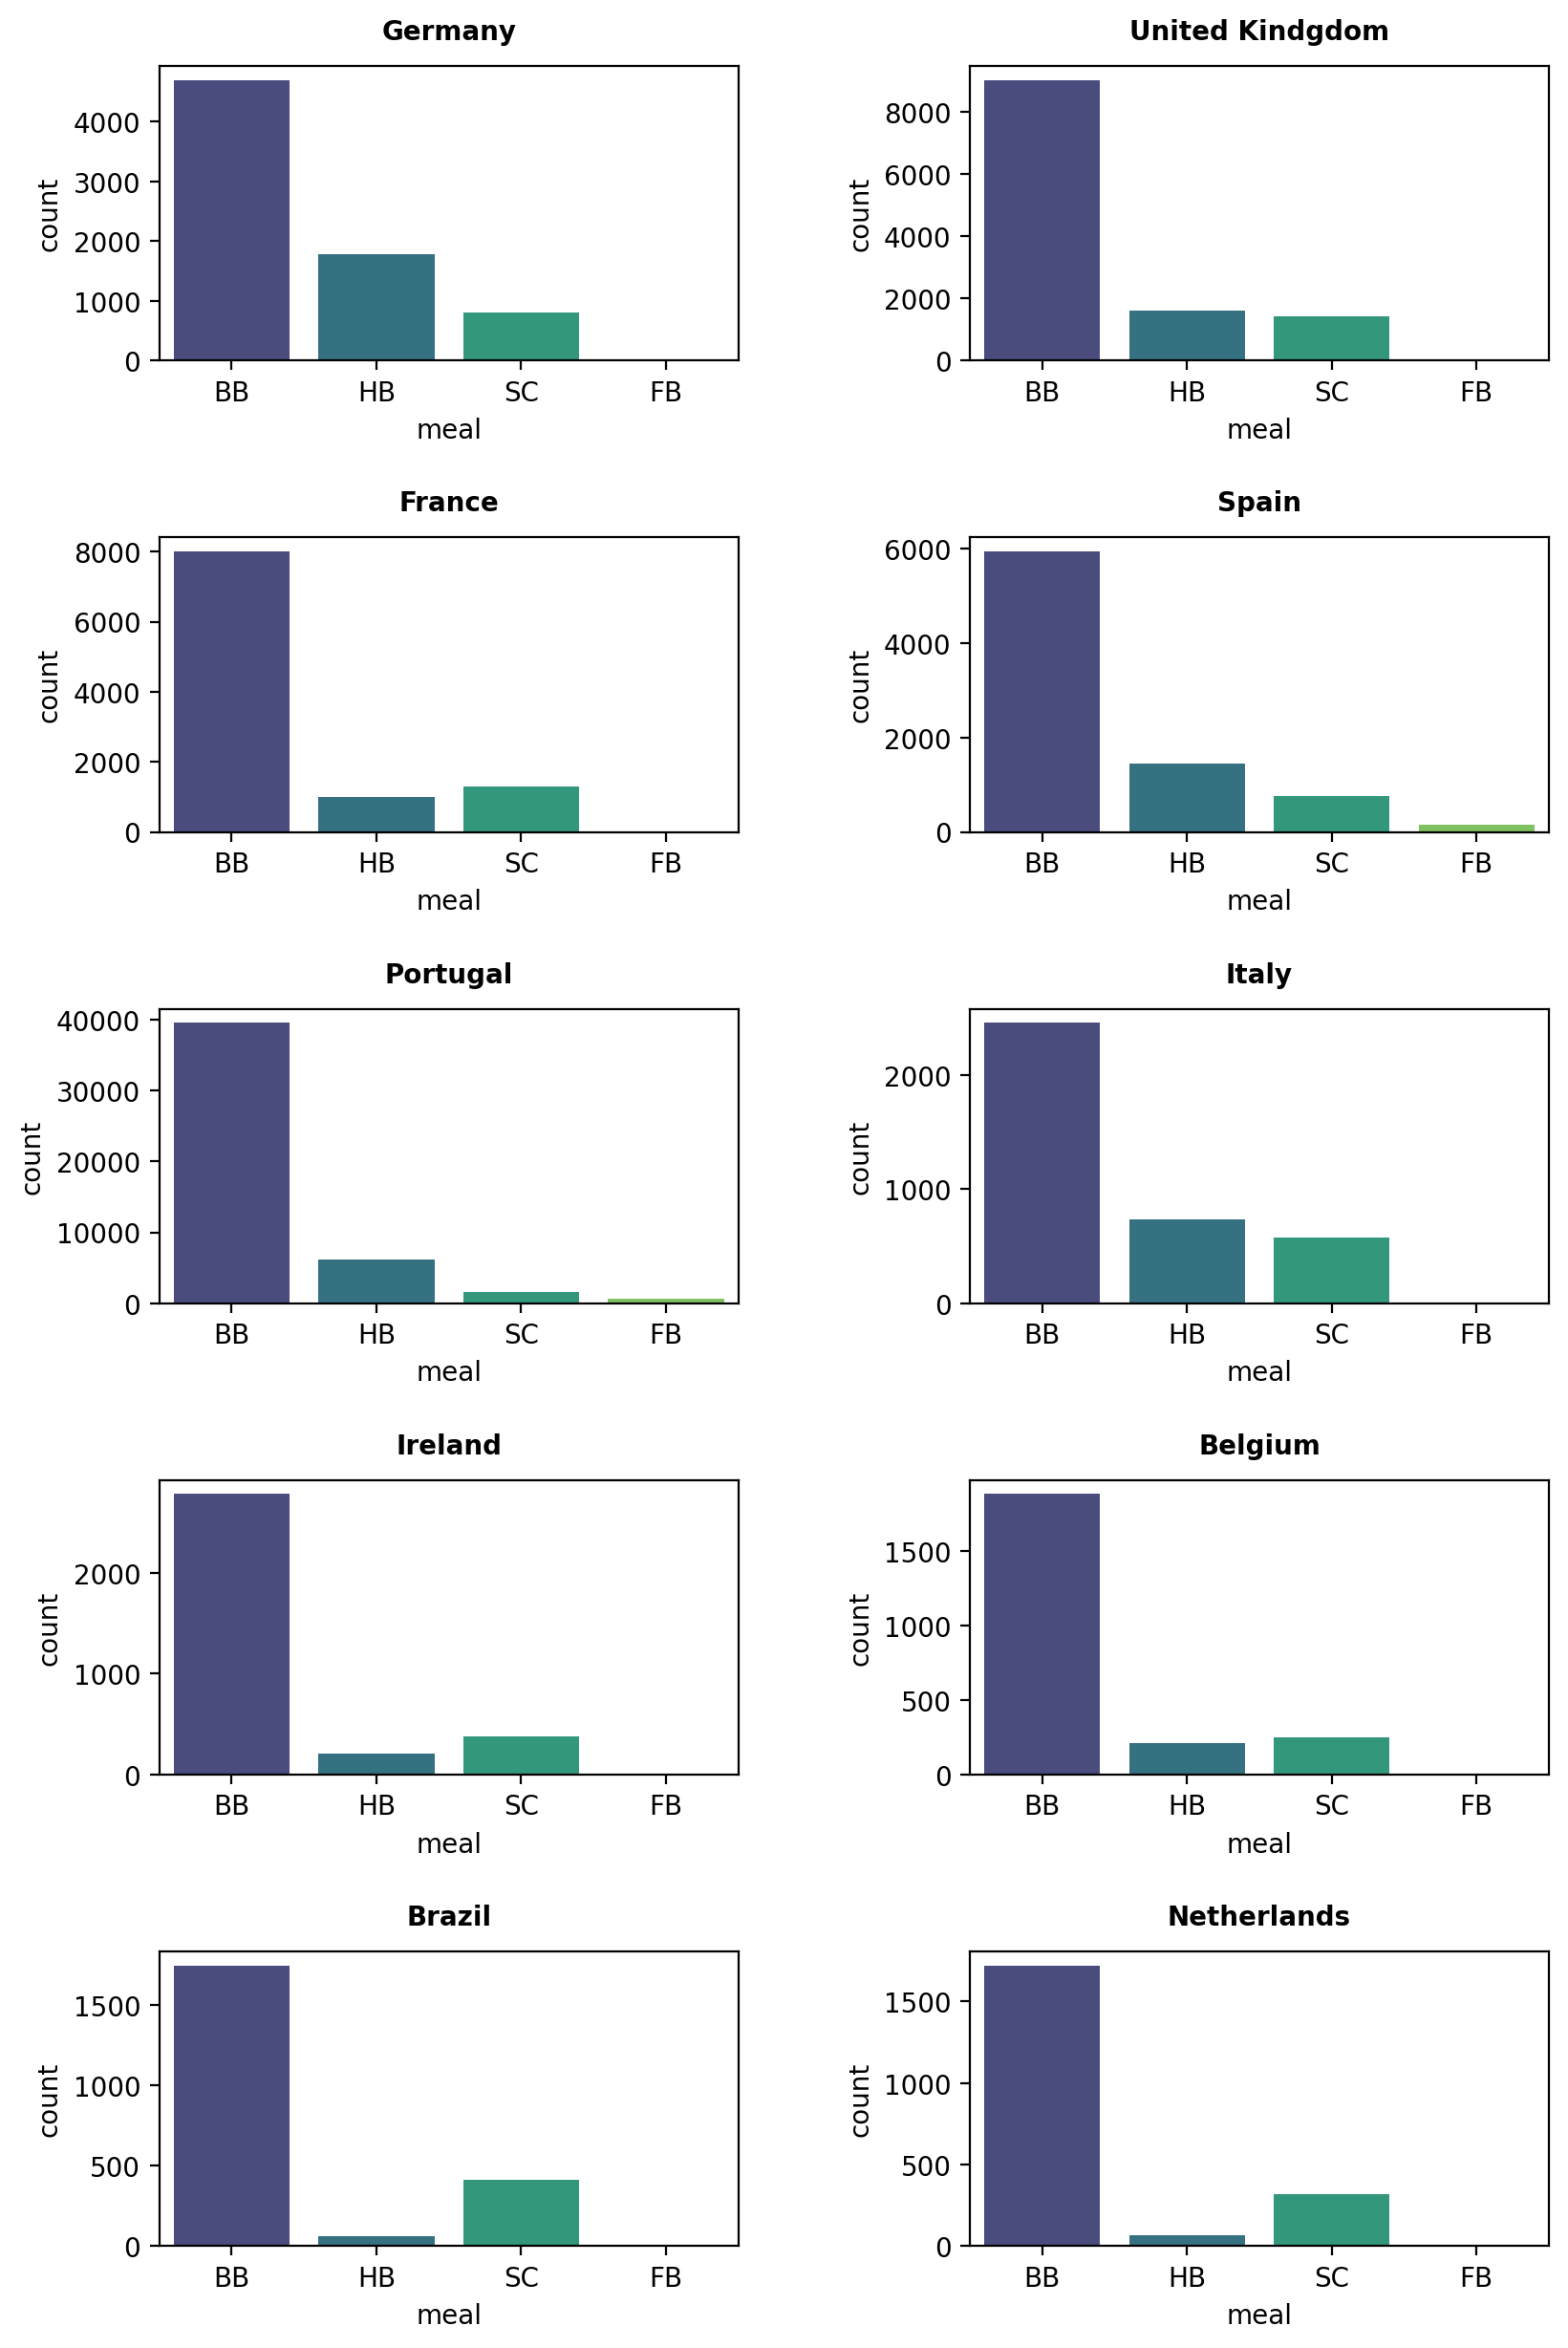

In [7]:

fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(8,12), dpi=200)

plt.tight_layout()

d = df[(df['meal'].isin(['BB', 'HB', 'SC', 'FB'])) & (df['country'].isin(countries.keys()))]
d['country'] = d['country'].apply(lambda d: countries[d])

count = 0
col = 0
for key, value in countries.items():
	sns.countplot(x='meal', data=d[d['country'] == value], palette='viridis',ax=axes[col][count], order = ['BB', 'HB', 'SC', 'FB', ])
	axes[col][count].set_title(value, fontsize=10, pad=10, fontweight=600)
	col = col if count == 0 else col + 1
	count = 1 if count == 0 else 0
   


fig.subplots_adjust(wspace=0.4, hspace=0.6)


print('BB – Bed & Breakfast; \n'
      'HB – Half board (breakfast and one other meal – usually dinner); \n'
      'SC – no meal package; \n'
      'FB – Full board (breakfast, lunch and dinner) \n')

# Range of values for ADR by country

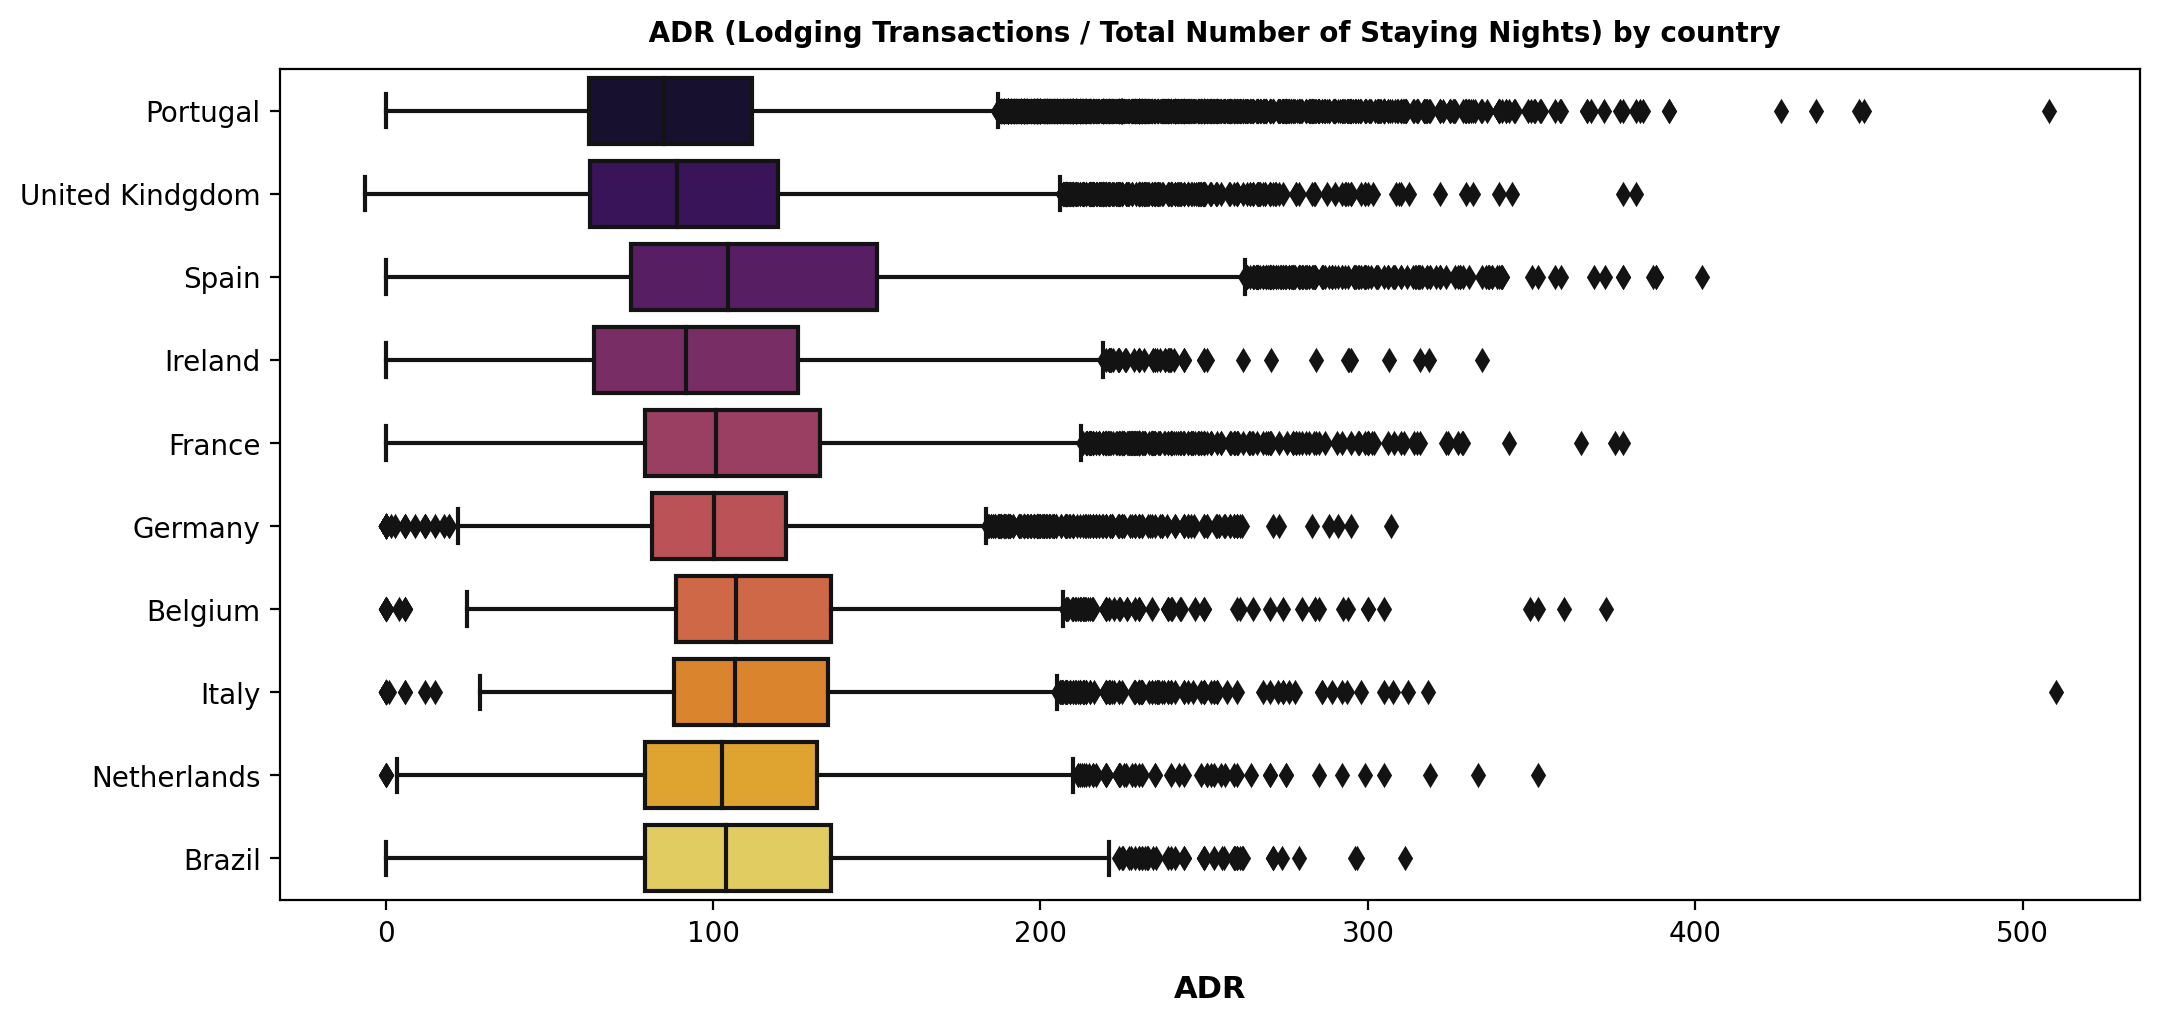

In [8]:

d = df[df['country'].isin(countries.keys())]
d['country'] = d['country'].apply(lambda d: countries[d])


plt.figure(figsize=(12,5.5), dpi=200)
sns.boxplot(data=d[d['adr'] < 1000],x='adr', y='country', palette='inferno')
plt.xlabel('ADR', fontsize=11, fontweight='black', labelpad=10)

plt.ylabel('')
plt.title(' ADR (Lodging Transactions / Total Number of Staying Nights) by country', fontsize=10, pad=10, fontweight='black');